In [20]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import uuid
from sklearn.cluster import MeanShift, estimate_bandwidth

In [220]:
import sys
import yellowbrick
import random
import math
import os

# Import the data

In [35]:
df = pd.read_csv('attributes.txt', sep=" ", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,57109,3398,8940,9824,10586,11204,8761,4396,110,192,...,286,254,211,166,184,125,121,80,75,NaN
1,5033,437,732,706,783,849,798,728,19,41,...,74,64,45,33,39,20,25,21,17,NaN
2,1753,214,215,177,238,210,291,408,18,12,...,45,49,47,32,30,22,14,15,8,NaN
3,3886,650,362,370,644,412,485,963,26,34,...,124,100,93,83,66,49,42,34,33,NaN
4,707,107,63,61,69,81,139,187,3,8,...,23,26,17,15,19,12,13,9,7,NaN


In [36]:
df.drop(df.columns[120], axis = 1, inplace = True)

In [38]:
id = list(range(0, 99))
df['location'] = id

In [39]:
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,location
0,57109,3398,8940,9824,10586,11204,8761,4396,110,192,...,286,254,211,166,184,125,121,80,75,0
1,5033,437,732,706,783,849,798,728,19,41,...,74,64,45,33,39,20,25,21,17,1
2,1753,214,215,177,238,210,291,408,18,12,...,45,49,47,32,30,22,14,15,8,2
3,3886,650,362,370,644,412,485,963,26,34,...,124,100,93,83,66,49,42,34,33,3
4,707,107,63,61,69,81,139,187,3,8,...,23,26,17,15,19,12,13,9,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1341,160,115,167,166,152,275,306,0,10,...,25,25,18,15,10,4,7,7,6,94
95,363,58,19,43,40,44,56,103,0,3,...,11,6,5,3,4,1,7,1,0,95
96,661,139,55,71,64,69,99,164,6,5,...,27,9,15,11,7,4,2,3,4,96
97,106,19,11,11,17,12,10,26,0,1,...,1,4,2,0,3,3,1,1,1,97


# Creating the clusters

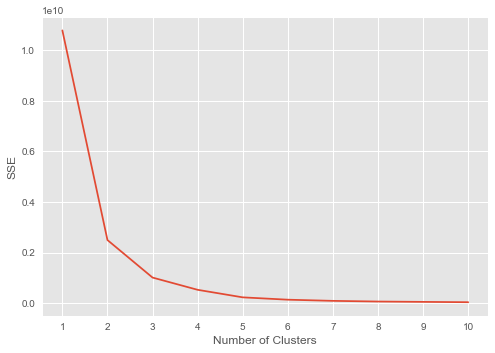

3


In [40]:
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
print(kl.knee)

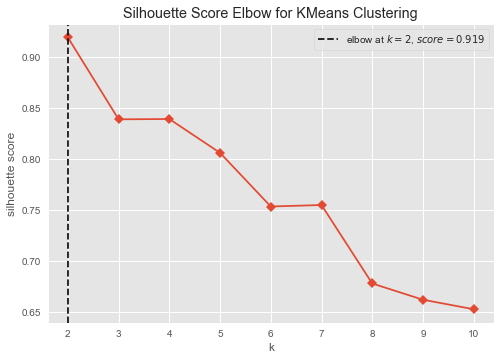

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(df)    
visualizer.poof()   

So we have 3 clusters for our 100 locations, by the best possible quantative analysis. 


In [136]:
km = KMeans(n_clusters=3).fit(df)

cluster_map = pd.DataFrame()
cluster_map['region'] = df.location
cluster_map['cluster'] = km.labels_



These are the 3 clusters. If you want more then we just simply change n_clusters=3 to something else.

In [221]:
cluster0 = cluster_map[cluster_map.cluster == 0]
cluster1 = cluster_map[cluster_map.cluster == 1]
cluster2 = cluster_map[cluster_map.cluster == 2]


# Creating the random locations inside each region

In [99]:
lat = [38.214710000000004, 38.219295, 38.22388, 38.228465, 38.23305, 38.237635, 38.24222, 38.246805, 38.25139, 38.255975, 38.26056]
log = [-85.75636, -85.751104, -85.745848, -85.740592, -85.735336, -85.73008, -85.724824, -85.719568, -85.714312, -85.709056, -85.7038]

In [108]:
location = 0
randomLocation = list()
randLat = 0
randLog = 0
for i in range (10):
    for j in range(10):
        randLat = random.uniform(lat[i], lat[i+1])
        randLog= random.uniform(log[i], log[i+1])
        randomLocation.append([location, randLat,randLog])
        location = location + 1
randLocs = pd.DataFrame(randomLocation, columns = ['region', 'lat',  'log'])


In [111]:
randLocs.to_csv('randomLocations.csv', index = False)

In [112]:
print (len(cluster_map[cluster_map.cluster == 0]))
print (len(cluster_map[cluster_map.cluster == 1]))
print (len(cluster_map[cluster_map.cluster == 2]))

88
3
8


# Finding the True minDistance and the approximation

In [225]:
import math

#the one where you calculate the distance from the ending location of that trip in that region and a random point in the region
#and take the average as minDist
def minDistance(region):
    csvPath = "region_" + str(region) +".txt"
    if is_non_zero_file(csvPath):
        regionDF = pd.read_csv(csvPath, sep=" ", header=None)
    else:
        return -1
    list_of_rows = [list(row) for row in regionDF.values]
    7 and 8 
    distList = []
    for row in list_of_rows:
        dist = eucledianDistance(row[7],row[8],randomLocation[region][1],randomLocation[region][2])
        distList.append(dist)
    return sum(distList)/len(distList)

#the one where youe take the average of all the ending locations in that region and find distance between that and a 
# random point in that region
def minDistanceApprox(region):
    csvPath = "region_" + str(region) +".txt"
    if is_non_zero_file(csvPath):
        regionDF = pd.read_csv(csvPath, sep=" ", header=None)
    else:
        return -1
    list_of_rows = [list(row) for row in regionDF.values]
    7 and 8 
    minDist = 100000000
    latSum = 0
    logSum = 0
    count = 0
    for row in list_of_rows:
        latSum = latSum + row[7]
        logSum = logSum + row[8]
        count = count +1
    avgLat = latSum/count
    avgLog = logSum/count
    
    dist = eucledianDistance(avgLat,avgLog,randomLocation[region][1],randomLocation[region][2])
    return dist

#helper function
def eucledianDistance(x2,y2, x1,y1):
    try:
        return math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
    except:
        return -1

#outer function. set Truth to False if you want approx, set Truth to True if you want real
def clusterMinDistance(cluster, threshold, truth):
    list_of_rows = [list(row) for row in cluster.values]
    regionsSeen = []
    
    for row in list_of_rows:
        if len(regionsSeen) >= len(cluster) * threshold:
            break
        if truth:
            val = minDistance(row[0])
        else: 
            val = minDistanceApprox(row[0])
        #file is empty so technically not really added to threshold
        if val > -1:
            regionsSeen.append(val)
    return regionsSeen

#helper function
import os
def is_non_zero_file(fpath):  
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0

In [231]:
#a quick test
print(clusterMinDistance(cluster2,0.1, True))
print(clusterMinDistance(cluster2,0.1, False))



[0.017609839430643877]
[0.009412169654103773]
